In [1]:
import os
import zipfile
import time
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.utils import make_grid
from torchvision import transforms
from PIL import Image
from torch.utils.data import Dataset, random_split, DataLoader

In [2]:
# PATH = './data/'
# TRAIN_PATH = os.path.join(PATH, 'train.zip')
# TEST_PATH = os.path.join(PATH, 'test.zip')

# with zipfile.ZipFile(TRAIN_PATH, 'r') as z:
#     z.extractall('.')
    
# with zipfile.ZipFile(TEST_PATH, 'r') as z:
#     z.extractall('.')

In [3]:
PATH = './model/'
model = torch.load(PATH)

(330, 394)
tensor([[ 2.9876, -3.8049]], grad_fn=<AddmmBackward0>)
Goshen is a cat with probability 0.998879


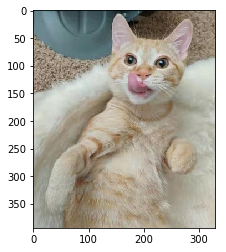

In [36]:
img = Image.open('./Goshen/goshen!.jpg')
plt.imshow(img)
print(img.size)
img = data_transform(img)
img = img.unsqueeze(0)
img = img.to(device)
output = trained_model(img)
print(output)
print('Goshen is a cat' if torch.max(output, 1)[1]==0 else 'Goshen is a dog', 'with probability', np.max(F.softmax(output, dim=1).detach().numpy()))

(1279, 1705)
tensor([[0.9979, 0.0021]], grad_fn=<SoftmaxBackward0>)
Goshen is a cat with probability 0.9979202


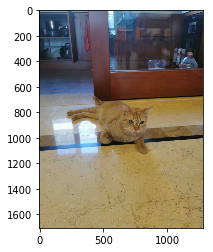

In [37]:
img = Image.open('./Goshen/ugly_goshen.jpg')
plt.imshow(img)
print(img.size)
img = data_transform(img)
img = img.unsqueeze(0)
img = img.to(device)
output = trained_model(img)
print(F.softmax(output, dim=1))
print('Goshen is a cat' if torch.max(output, 1)[1]==0 else 'Goshen is a dog', 'with probability', np.max(F.softmax(output, dim=1).detach().numpy()))

(1279, 1705)
tensor([[0.9507, 0.0493]], grad_fn=<SoftmaxBackward0>)
Goshen is a cat with probability 0.9506527


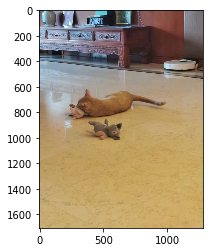

In [38]:
img = Image.open('./Goshen/back_goshen.jpg')
plt.imshow(img)
print(img.size)
img = data_transform(img)
img = img.unsqueeze(0)
img = img.to(device)
output = trained_model(img)
print(F.softmax(output, dim=1))
print('Goshen is a cat' if torch.max(output, 1)[1]==0 else 'Goshen is a dog', 'with probability', np.max(F.softmax(output, dim=1).detach().numpy()))

(1279, 1705)
tensor([[9.9995e-01, 4.6134e-05]], grad_fn=<SoftmaxBackward0>)
Goshen is a cat with probability 0.99995387


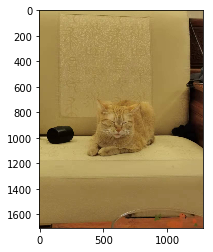

In [35]:
img = Image.open('./Goshen/super_ugly.jpg')
plt.imshow(img)
print(img.size)
img = data_transform(img)
img = img.unsqueeze(0)
img = img.to(device)
output = trained_model(img)
print(F.softmax(output, dim=1))
print('Goshen is a cat' if torch.max(output, 1)[1]==0 else 'Goshen is a dog', 'with probability', np.max(F.softmax(output, dim=1).detach().numpy()))

In [39]:
test_imgs = os.listdir('test/')

labels = {}
with torch.no_grad():
    for test_img in test_imgs:
        img = Image.open('test/'+test_img)
        img = data_transform(img)
        img = img.unsqueeze(0)
        img = img.to(device)
        
        trained_model.eval()
        output = trained_model(img)
        pred = F.softmax(output, dim=1)[:, 1].tolist()
        labels[int(test_img.split('.')[0])] = pred[0]

In [43]:
res = []
for i in range(1, len(labels) + 1):
    res.append(labels[i])
               
df = {'id':sorted(labels.keys()), 'label':res}
df = pd.DataFrame(df)
df.to_csv('submit.csv', index=False)